In [1]:
import networkx as nx
import dwave_networkx as dnx
import random
import matplotlib.pyplot as plt
import pulp
import numpy as np

from lpSolver import solve
from uccgGenerator import tree_insertion, Graph
from plotNetwork import plotGraph, plotCoupling, plotGraphIS
from itertools import combinations

In [2]:
def get_index(child, chordals):
    for i in range(len(chordals)):
        if chordals[i] == child:
            return i

In [3]:
def get_children(g):
    simplicial_vertices = filter(lambda v: dnx.is_simplicial(g, v), g.nodes)
    children = []
    total = 0
    n = len(g)
    for u in simplicial_vertices:
        cg = Graph(g)
        edges = list(cg.edges(u))
        cg.remove_edges_from(edges)
        cg.remove_node(u)
        cliques = set(cg.nodes).union(set(cg.edges))
        m = len(cliques)
        for c in cliques:
            cg1 = Graph(cg)
            if type(c) is int:
                cg1.add_edge(u, c)
            else:
                cg1.add_edges_from([(u, v) for v in c])
            if cg1 == g:
                continue
            cg1.prob = 1./(n*m)
            total += cg1.prob
            if cg1 in children:
                i = get_index(cg1, children)
                children[i].prob += cg1.prob
            else:
                children.append(cg1)
    for child in children:
        assert child != g
    g_self = Graph(g)
    g_self.prob = 1 - total
    children.append(g_self)
    assert sum([c.prob for c in children]) == 1
    return children + [g_self]

In [8]:
chordals = []
g = nx.complete_graph(20)
list(combinations(g.edges, 2))
for i in range(3, 6):
    for edge_set in combinations(g.edges, i):
        tmp = nx.Graph()
        tmp.add_edges_from(edge_set)
        if nx.is_chordal(tmp) and nx.is_connected(tmp) and len(tmp) == 4:
            chordals.append(tmp)

KeyboardInterrupt: 

In [ ]:
k = len(chordals)
P = np.zeros((k, k))

In [ ]:
for i, c in enumerate(chordals):
    children = get_children(c)
    s = 0
    visited = set()
    for child in children:
        j = get_index(child, chordals)
        P[i,j] = child.prob

In [ ]:
i0 = random.randint(0, k-1)

plotGraph(chordals[i0])

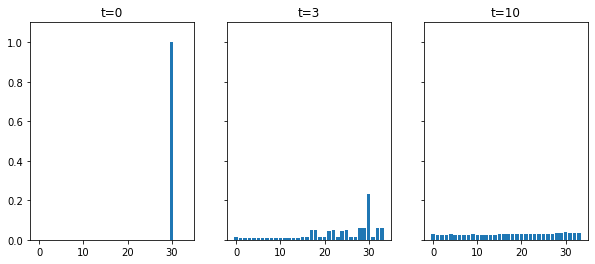

In [38]:
d = np.zeros((1,k))
d[0, i0] = 1

d.squeeze(0)
# plt.figure(figsize=(20, 5))
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 4)) 
gaps = [0, 3, 10]
n = 0
for i in range(12):
    if i in gaps:
        ax[n].plot(1,3,n)
        ax[n].bar([i for i in range(k)],d.squeeze(0))
        ax[n].set_ylim([0,1.1])
        ax[n].set_title(f"t={i}")
        n += 1
    d = d.dot(P)
plt.savefig('/Users/wenbosun/Desktop/distribution.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [ ]:
          
plt.figure(figsize=(18, 13))
for i in range(34):
    plt.subplot(5, 7, i+1)
    plotGraph(l[i], pos=nx.kamada_kawai_layout(g))
plt.savefig('/Users/wenbosun/Desktop/chordal.png', dpi=300, bbox_inches='tight', pad_inches=0)